# Exporatory Data Analysis

Classical statistics is focused on **inference**, a set of procedures for getting conclusions about large populations based on small samples. **Data analysis** includes statistical inference as just on component.


## Estimates of Location
A basic step in exploring data is getting a 'typical value' for each feature (variable): an estimate of where most of the data is located (i.e. its central tendency). 

Metrics and Estimates Note: statisticians estimate and data scientist measure.

In [36]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
try:
    import common
    DATA = common.dataDirectory()
except ImportError:
    DATA = Path().resolve() / 'data'

In [41]:
DFW_AIRPORT_DELAYS_CSV = DATA / 'dfw_airline.csv'
STATE_CSV = DATA / 'state.csv'
SP500_SECTORS = DATA / 'sp500_sectors.csv'
SP500 = DATA / 'sp500_data.csv.gz'

In [4]:
df = pd.read_csv(STATE_CSV)
df.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


### Compute the mean, trimmed mean, the median of the state 
Ideas: mean is sensitive to extreme values (outliers) and median and trimmed are less sensitive to outliers and unusual distributions and hence are more robust.

In [5]:
print('population mean {}'.format(df['Population'].mean()))
print('population median {}'.format(df['Population'].median()))
print('population trimmed mean {}'.format(trim_mean(df['Population'], .1)))

population mean 6162876.3
population median 4436369.5
population trimmed mean 4783697.125


Note: mean > trimmed mean > mean

### Compute the average murder rate for the country
Note: we need to use a weighted mean to account for different populations in the states.

In [6]:
print('weighted mean {}'.format(np.average(df['Murder.Rate'], weights=df['Population'])))

weighted mean 4.445833981123393


## Estimates of Variability

Variability refers to dispersion, whether the data values are tightly clustered or spread out. At the heart of statisitcs lies variability: measuring it, reducing it, distinguishing random from real, identifying the sources of real variability, and making decisions in the presence of it.

### Estimates Based on Percentiles

Statistics based on sorted(ranked) data are referred to as **order statistics**. The most basic is range: largest value in data minus smallest value in data. Range is extremely sensitive to outliers and not very useful as a general measure of dispersion in the data. There are techniques that account for outliers. 

### Percentile:
The Pth percentile is a value such that a least P percent of the values take on this value or less and at least (100-P) percent of the values take on this value of more.

A common measurement of variability is the difference between the 25th percentile and the 75th percentile, called the **interquartile range** (IQR).

### Computing standard deviation, quantiles, and robust MAD of State Population

In [7]:
print('Population standard deviation ',df['Population'].std())
print('Population IQR ',df['Population'].quantile(.75) - df['Population'].quantile(.25))
print('Population robust MAD ',robust.scale.mad(df['Population']))

Population standard deviation  6848235.347401142
Population IQR  4847308.0
Population robust MAD  3849876.1459979336


Note std is almost twice as large as MAD. Not surprising since std is sensitive to outliers

## Exploring Data Distribution

Sometime we need to see how the data is distributed rather than the location and variability. Some key terms for exploring data distributions are: 

- **Boxplot** 
- **Frequency table**
- **Histogram**
- **Density plot**

### **Percentiles and Boxplots**
Percentiles are especially valuable for summarizing the tails of the distributions.

### Compute some percentiles of the murder rate by state.

In [8]:
df['Murder.Rate'].quantile([.05, .25, .5, .75, .95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

Note: The median is 4 murders per 100,000 people, but there's some variability: 5th percentile is 1.6 and the 95th percentile is 6.51

### Plotting boxplot of the population by state

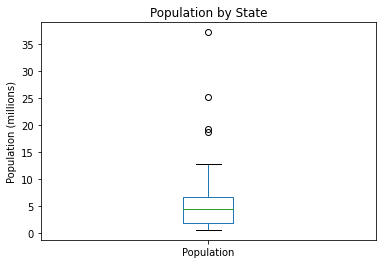

In [35]:
ax = (df['Population']/1000000).plot.box(title='Population by State')
ax.set_ylabel('Population (millions)')
plt.show()

From this boxplot we can immediately see that the median state population is about 5 million, half the states fall between 2 million and about 7 million, and there are some high population outliers.

### **Frequency Table and Histograms**

### Compute frequency table for population by state

In [10]:
binnedPopulation = pd.cut(df['Population'], 10)
binnedPopulation.value_counts()

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(33584923.0, 37253956.0]     1
(22577824.0, 26246857.0]     1
(18908791.0, 22577824.0]     1
(15239758.0, 18908791.0]     1
(29915890.0, 33584923.0]     0
(26246857.0, 29915890.0]     0
Name: Population, dtype: int64

In [11]:
binnedPopulation.name = 'binnedPopulation'
dfbinned = pd.concat([df, binnedPopulation], axis=1)
dfbinned = dfbinned.sort_values(by='Population')

groups = []
for group, subset in dfbinned.groupby(by='binnedPopulation'):
    groups.append({
        'BinRange': group,
        'Count': len(subset),
        'States': ','.join(subset.Abbreviation)
    })
pd.DataFrame(groups)

,BinRange,Count,States
0,"(526935.67, 4232659.0]",24,"WY,VT,ND,AK,SD,DE,MT,RI,NH,ME,HI,ID,NE,WV,NM,N..."
1,"(4232659.0, 7901692.0]",14,"KY,LA,SC,AL,CO,MN,WI,MD,MO,TN,AZ,IN,MA,WA"
2,"(7901692.0, 11570725.0]",6,"VA,NJ,NC,GA,MI,OH"
3,"(11570725.0, 15239758.0]",2,"PA,IL"
4,"(15239758.0, 18908791.0]",1,FL
5,"(18908791.0, 22577824.0]",1,NY
6,"(22577824.0, 26246857.0]",1,TX
7,"(26246857.0, 29915890.0]",0,
8,"(29915890.0, 33584923.0]",0,
9,"(33584923.0, 37253956.0]",1,CA


Note: It's important to include empty bins, which is useful information.

### Plotting a Histogram

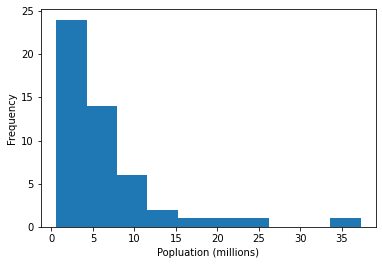

In [34]:
ax = (df['Population']/1000000).plot.hist()
ax.set_xlabel('Popluation (millions)')
plt.show()

Note: First and second moment are seen as location and variability, respectively. The third and fourth moments are called **skewness**(whether the data is skewed to larger or smaller values) and **kurtosis**(the propensity of the data to have extreme values). Boxplots help with discovering kurtosis and histograms help with discovering skewness.

**Density Plots and Estimates**: Density plots can be though of as smoothed histograms. Density plots are useful for showing the shape of a distribution and identifying its mode, skewness, and kurtosis.

### Plotting density plot superposed on a histogram

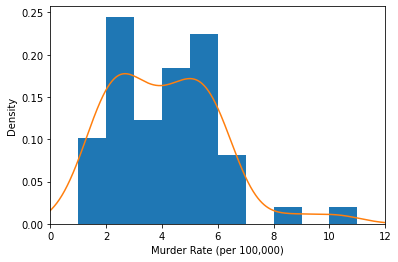

In [33]:
ax = df['Murder.Rate'].plot.hist(density=True, xlim=[0,12], bins=range(1,12))
df['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (per 100,000)')
plt.show()

## Exploring Binary and Categorical Data

For categorical data, simple proportions or percentages tell the story of the data

Key terms: 
- **Mode**
- **Expected Value** 
- **Bar chart** 
- **Pie charts**(usually seen as less visually informative by statisticians and data visualization experts)

In [14]:
dfw = pd.read_csv(DFW_AIRPORT_DELAYS_CSV)
dfw.head()

,Carrier,ATC,Weather,Security,Inbound
0,64263.16,84856.5,11235.42,343.15,118427.82


Getting a summary of binary variable or categorical variables with a few categories is just figuring out the proportion of 1s, or the proportions of the important categories.

In [15]:
dfw = pd.read_csv(DFW_AIRPORT_DELAYS_CSV)
100 * dfw / dfw.values.sum()

,Carrier,ATC,Weather,Security,Inbound
0,23.022989,30.400781,4.025214,0.122937,42.428079


### Plotting bar charts of airport delays per year by cause

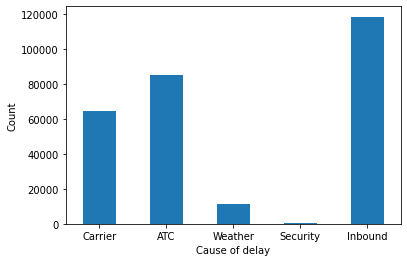

In [32]:
ax = dfw.transpose().plot.bar(legend=False, rot=0)
ax.set_xlabel('Cause of delay')
ax.set_ylabel('Count')
plt.show()

Note: this bar chart resembles a histogram; in a bar chart the x-axis represents different categories of a factor, while in a histogram the x-axis represents values of a single variable on a numeric scale.

### Mode and Expected Value

Above we see that the mode for cause of airline delays is 'Inbound'. 

Expected value is a form of weighted mean, in which the weights are probabilities. To calculate:
1. Multiply each outcome by its probability of occurrence.
2. Sum these values.

#### Example:
A marketer for a new cloud technology offers tow levels of service, one priced at \$300/month and another at \$50/month. The marketer offers a free webinar to generate leads, and the firm figures that 5\% of the attendees will sign up for the \$300 service, 15\% will sign up for the \$50 service. The expected value of a webinar attendee is:
$$
EV = (.05)*300 + (.15)*50 = \$22.5/month
$$

### Probability
Probability that an event will happen is the proportion of times it will occur if the situation could be repeated over and over, countless times.

## Correlation

Given variables X and Y (each with measured data), to compute Pearson's correlation coefficient:
$$
r = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{(n-1)s_x s_y}
$$

where $s_x$ and $s_y$ are standard deviations of X and Y. Note that $-1 \leq r\leq 1$ where $-1$ is perfectly negative correlation, $1$ is perfectly positive correlation, and $0$ indicates no correlation.

### Compute correlation between telecommunication stock returns from July 2021 through June 2015

In [44]:
sp500 = pd.read_csv(SP500, index_col = 0)
sp500.head()

,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,ALTR,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
1993-01-29,0.0,0.060124,-0.022100,0.0,0.0,0.018897,0.007368,0.092165,0.259140,-0.007105,...,0.0,0.0,0.34716,0.0,0.04167,0.00000,0.015564,1.75,0.1250,0.0
1993-02-01,0.0,-0.180389,0.027621,0.0,0.0,0.018889,0.018425,0.115207,-0.100775,0.063893,...,0.0,0.0,-0.23144,0.0,0.00000,-0.01041,0.007782,1.25,0.1250,0.0
1993-02-02,0.0,-0.120257,0.035900,0.0,0.0,-0.075573,0.029482,-0.023041,0.028796,-0.014192,...,0.0,0.0,-0.11572,0.0,0.00000,0.00000,-0.007792,-0.25,0.0000,0.0
1993-02-03,0.0,0.060124,-0.024857,0.0,0.0,-0.151128,0.003689,-0.253454,-0.043190,-0.007105,...,0.0,0.0,-0.08679,0.0,0.04167,-0.04167,-0.038919,-0.50,0.0625,0.0
1993-02-04,0.0,-0.360770,-0.060757,0.0,0.0,0.113350,-0.022114,0.069862,0.000000,-0.007096,...,0.0,0.0,0.14465,0.0,-0.04166,-0.03126,-0.046711,0.00,0.0625,0.0


In [46]:
sp500_sector = pd.read_csv(SP500_SECTORS)
sp500_sector.head()

,sector,sector_label,sub_sector,symbol
0,information_technology,Technology,data_processing_&_outsourced_services,ADS
1,information_technology,Technology,systems_software,CA
2,information_technology,Technology,systems_software,MSFT
3,information_technology,Technology,systems_software,RHT
4,information_technology,Technology,it_consulting_&_services,CTSH


In [47]:
sp500_sector['sector'].unique()

array(['information_technology', 'industrials', 'energy',
       'consumer_discretionary', 'utilities', 'materials', 'etf',
       'telecommunications_services', 'consumer_staples', 'financials',
       'health_care'], dtype=object)

In [48]:
telecom_sym = sp500_sector[sp500_sector['sector'] == 'telecommunications_services']['symbol']
telecom = sp500.loc[sp500.index >= '2012-07-01', telecom_sym]
telecom.head()

,T,CTL,FTR,VZ,LVLT
2012-07-02,0.422496,0.140847,0.070879,0.554180,-0.519998
2012-07-03,-0.177448,0.066280,0.070879,-0.025976,-0.049999
2012-07-05,-0.160548,-0.132563,0.055128,-0.051956,-0.180000
2012-07-06,0.342205,0.132563,0.007875,0.140106,-0.359999
2012-07-09,0.136883,0.124279,-0.023626,0.253943,0.180000


In [49]:
telecom.corr()

,T,CTL,FTR,VZ,LVLT
T,1.000000,0.474683,0.327767,0.677612,0.278626
CTL,0.474683,1.000000,0.419757,0.416604,0.286665
FTR,0.327767,0.419757,1.000000,0.287386,0.260068
VZ,0.677612,0.416604,0.287386,1.000000,0.242199
LVLT,0.278626,0.286665,0.260068,0.242199,1.000000


Note: We can see that Verizon(VZ) and ATT(T) have the highest correlation. Level 3 (LVLT), has the lowest correlation with others.

### Compute heatmap of daily returns for major exchange-traded funds (ETFs).

<AxesSubplot:>

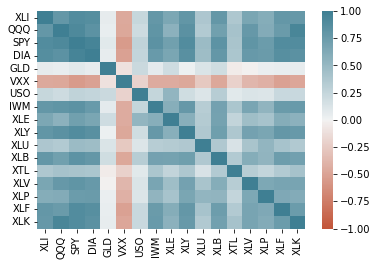

In [58]:
etfs_sym = sp500_sector[sp500_sector['sector'] == 'etf']['symbol']
etfs = sp500.loc[sp500.index > '2012-07-01', etfs_sym]
sns.heatmap(etfs.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True))

Note: ETFs for the S&P 500 (SPY) and the Dow Jones Index (DIA) have a high correlation. Similarly, the QQQ and the XLK, composed mostly of technology companies are positively correlated. Defensive ETFs, such as thosee tracking gold prices (GLD), oil prices (USO), or market volatility (VXX), tend to be weakly or negatively correlated with the other ETFs.

Also the correlation coefficient is sensitive to outliers in the data.

## Scatterplots

### Plotting scatterplot of correlation between returns for ATT and Verizon

The standard way to visualize the relationship between two measured data variables is with a scatterplot.

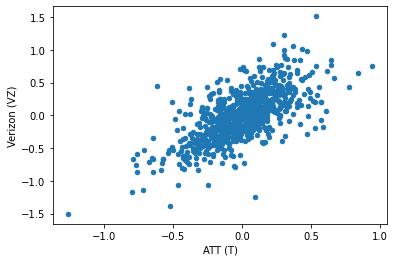

In [60]:
ax = telecom.plot.scatter(x='T', y='VZ')
ax.set_xlabel('ATT (T)')
ax.set_ylabel('Verizon (VZ)')
plt.show()

Note: The returns have a positive relationship: while they cluster around zero, on most days, the stock go up or go down in tandem.

# Exploring Two or More Variables

## Hexagonal Binning and Contours (Plotting Numeric Versus Numeric Data)